<a href="https://colab.research.google.com/github/Aniket7773/Signature-Verification-Model-Using-Ensemble-Learning/blob/main/VGG16retrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
!pip install opencv-python
import cv2
import numpy as np
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
!pip install scikit-learn
from sklearn.model_selection import train_test_split
!pip install matplotlib
import matplotlib.pyplot as plt


# Define the root directory path
root_dir = "/signdata2-20231227T075952Z-001/signdata2/train"

# Initialize empty lists to store file paths and labels
file_paths = []
labels = []
image=[]
# Function to label images and append to lists
def label_images(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith((".tif")):  # Assuming your images are in PNG format
            image_path = os.path.join(directory, filename)
            #print(image_path)
            file_paths.append(image_path)
            labels.append(label)

# Traverse the directory structure and label images
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)

    if os.path.isdir(subdir_path):
        if subdir.endswith("_forg"):
            label = 0  # Forgery label
            #print(label)
        else:
            label = 1  # Genuine label

        image_dir = os.path.join(subdir_path)
        #image.append(image_dir)
        if os.path.exists(image_dir):
            image.append(image_dir)
            label_images(image_dir, label)

print(labels)
print(len(file_paths))
print((image))

In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load and preprocess the images
def load_and_preprocess_image(file_path, label):
    img = cv2.imread(file_path)
    img = cv2.resize(img, (224, 224))  # Resize to VGG16 input size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img, label

# Create a list of image data and labels
data = []
for file_path, label in zip(file_paths, labels):
    img, label = load_and_preprocess_image(file_path, label)
    data.append((img, label))

# Split data into training and validation sets
X, y = zip(*data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model and add the VGG16 base model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 1 output node for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Convert data to NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=51,  # Adjust the number of epochs as needed
    batch_size=100,  # Adjust batch size as needed
    verbose=1
)
model.save('cnn2-signature-verification.h5')
# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {test_accuracy}')


Epoch 1/51


44/44 [==============================] - 2256s 51s/step - loss: 0.5656 - accuracy: 0.7133 - val_loss: 0.3915 - val_accuracy: 0.8181
Epoch 2/51
44/44 [==============================] - 2226s 51s/step - loss: 0.3140 - accuracy: 0.8729 - val_loss: 0.2136 - val_accuracy: 0.9030
Epoch 3/51
44/44 [==============================] - 2387s 54s/step - loss: 0.2323 - accuracy: 0.9147 - val_loss: 0.1386 - val_accuracy: 0.9418
Epoch 4/51
44/44 [==============================] - 2182s 50s/step - loss: 0.1210 - accuracy: 0.9545 - val_loss: 0.1818 - val_accuracy: 0.9391
Epoch 5/51
44/44 [==============================] - 2151s 49s/step - loss: 0.1307 - accuracy: 0.9563 - val_loss: 0.1218 - val_accuracy: 0.9584
Epoch 6/51
44/44 [==============================] - 2157s 49s/step - loss: 0.0646 - accuracy: 0.9787 - val_loss: 0.0630 - val_accuracy: 0.9825
Epoch 7/51
44/44 [==============================] - 2147s 49s/step - loss: 0.0387 - accuracy: 0.9868 - val_loss: 0.0500 - val_accuracy: 0.98

C:\Users\BEAST\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


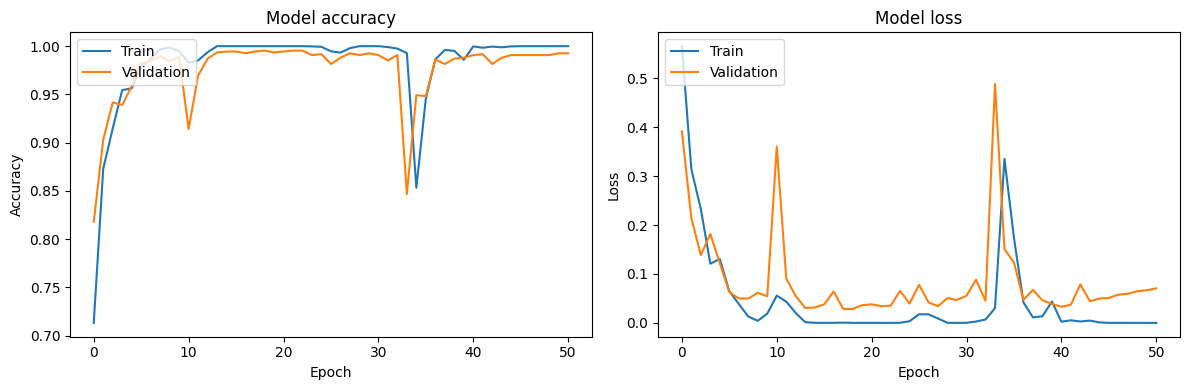

In [8]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                